In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

### Generate The clustering Data

In [38]:
x_train, _ = make_blobs(n_samples=500, centers=3, n_features=3, random_state=20)

### Visualize the Data

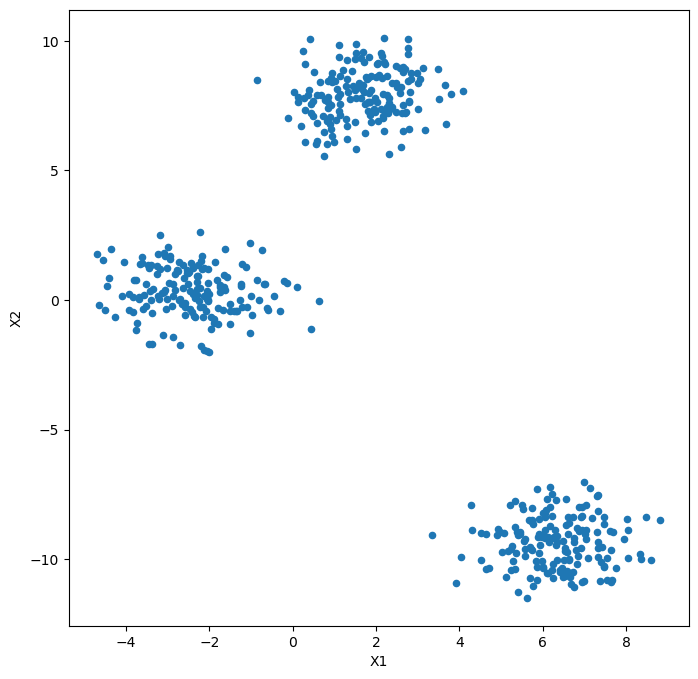

In [39]:
df=pd.DataFrame(dict(x=x_train[:, 0], y=x_train[:, 1]))
fig, ax=plt.subplots(figsize=(8,8))
df.plot(ax=ax, kind='scatter', x='x', y='y')
plt.xlabel("X1")
plt.ylabel('X2')
plt.show()

In [40]:
df=pd.read_csv('Cricket.csv', encoding='latin1')

In [41]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [42]:
df.dtypes

Player     object
Span       object
Mat         int64
Inns        int64
NO          int64
Runs        int64
HS         object
Ave       float64
BF          int64
SR        float64
100         int64
50          int64
0           int64
dtype: object

In [43]:
df.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165
std,74.211716,70.321022,14.421710,2551.873313,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755
min,128.000000,127.000000,4.000000,5080.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000
25%,188.000000,177.000000,17.500000,5759.000000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000
50%,232.000000,217.000000,29.000000,6798.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000
75%,281.500000,261.500000,40.000000,8739.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000


In [44]:
numeric_cols=df.drop("Player", axis=1)
player=df.pop("Player")

numeric_cols=numeric_cols.drop("Span", axis=1)
span=df.pop("Span")

numeric_cols=numeric_cols.drop("HS", axis=1)
hs=df.pop("HS")

In [45]:
df.head()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0
0,463,452,41,18426,44.83,21367,86.23,49,96,20
1,404,380,41,14234,41.98,18048,78.86,25,93,15
2,375,365,39,13704,42.03,17046,80.39,30,82,20
3,445,433,18,13430,32.36,14725,91.20,28,68,34
4,448,418,39,12650,33.37,16020,78.96,19,77,28


In [46]:
from scipy.stats import zscore

In [47]:
numeric_cols=numeric_cols.apply(zscore)

In [48]:
cricket_df=numeric_cols.join(player)
cricket_df=cricket_df.join(span)
cricket_df=cricket_df.join(hs)

In [49]:
cricket_df.head()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0,Player,Span,HS
0,2.955282,3.169333,0.764963,4.262328,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,SR Tendulkar (INDIA),1989-2012,200*
1,2.155179,2.138915,0.764963,2.609117,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,KC Sangakkara (Asia/ICC/SL),2000-2015,169
2,1.761908,1.924245,0.625397,2.400099,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,RT Ponting (AUS/ICC),1995-2012,164
3,2.711183,2.897417,-0.840046,2.292041,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,ST Jayasuriya (Asia/SL),1989-2011,189
4,2.751866,2.682747,0.625397,1.984430,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,DPMD Jayawardene (Asia/SL),1998-2015,144


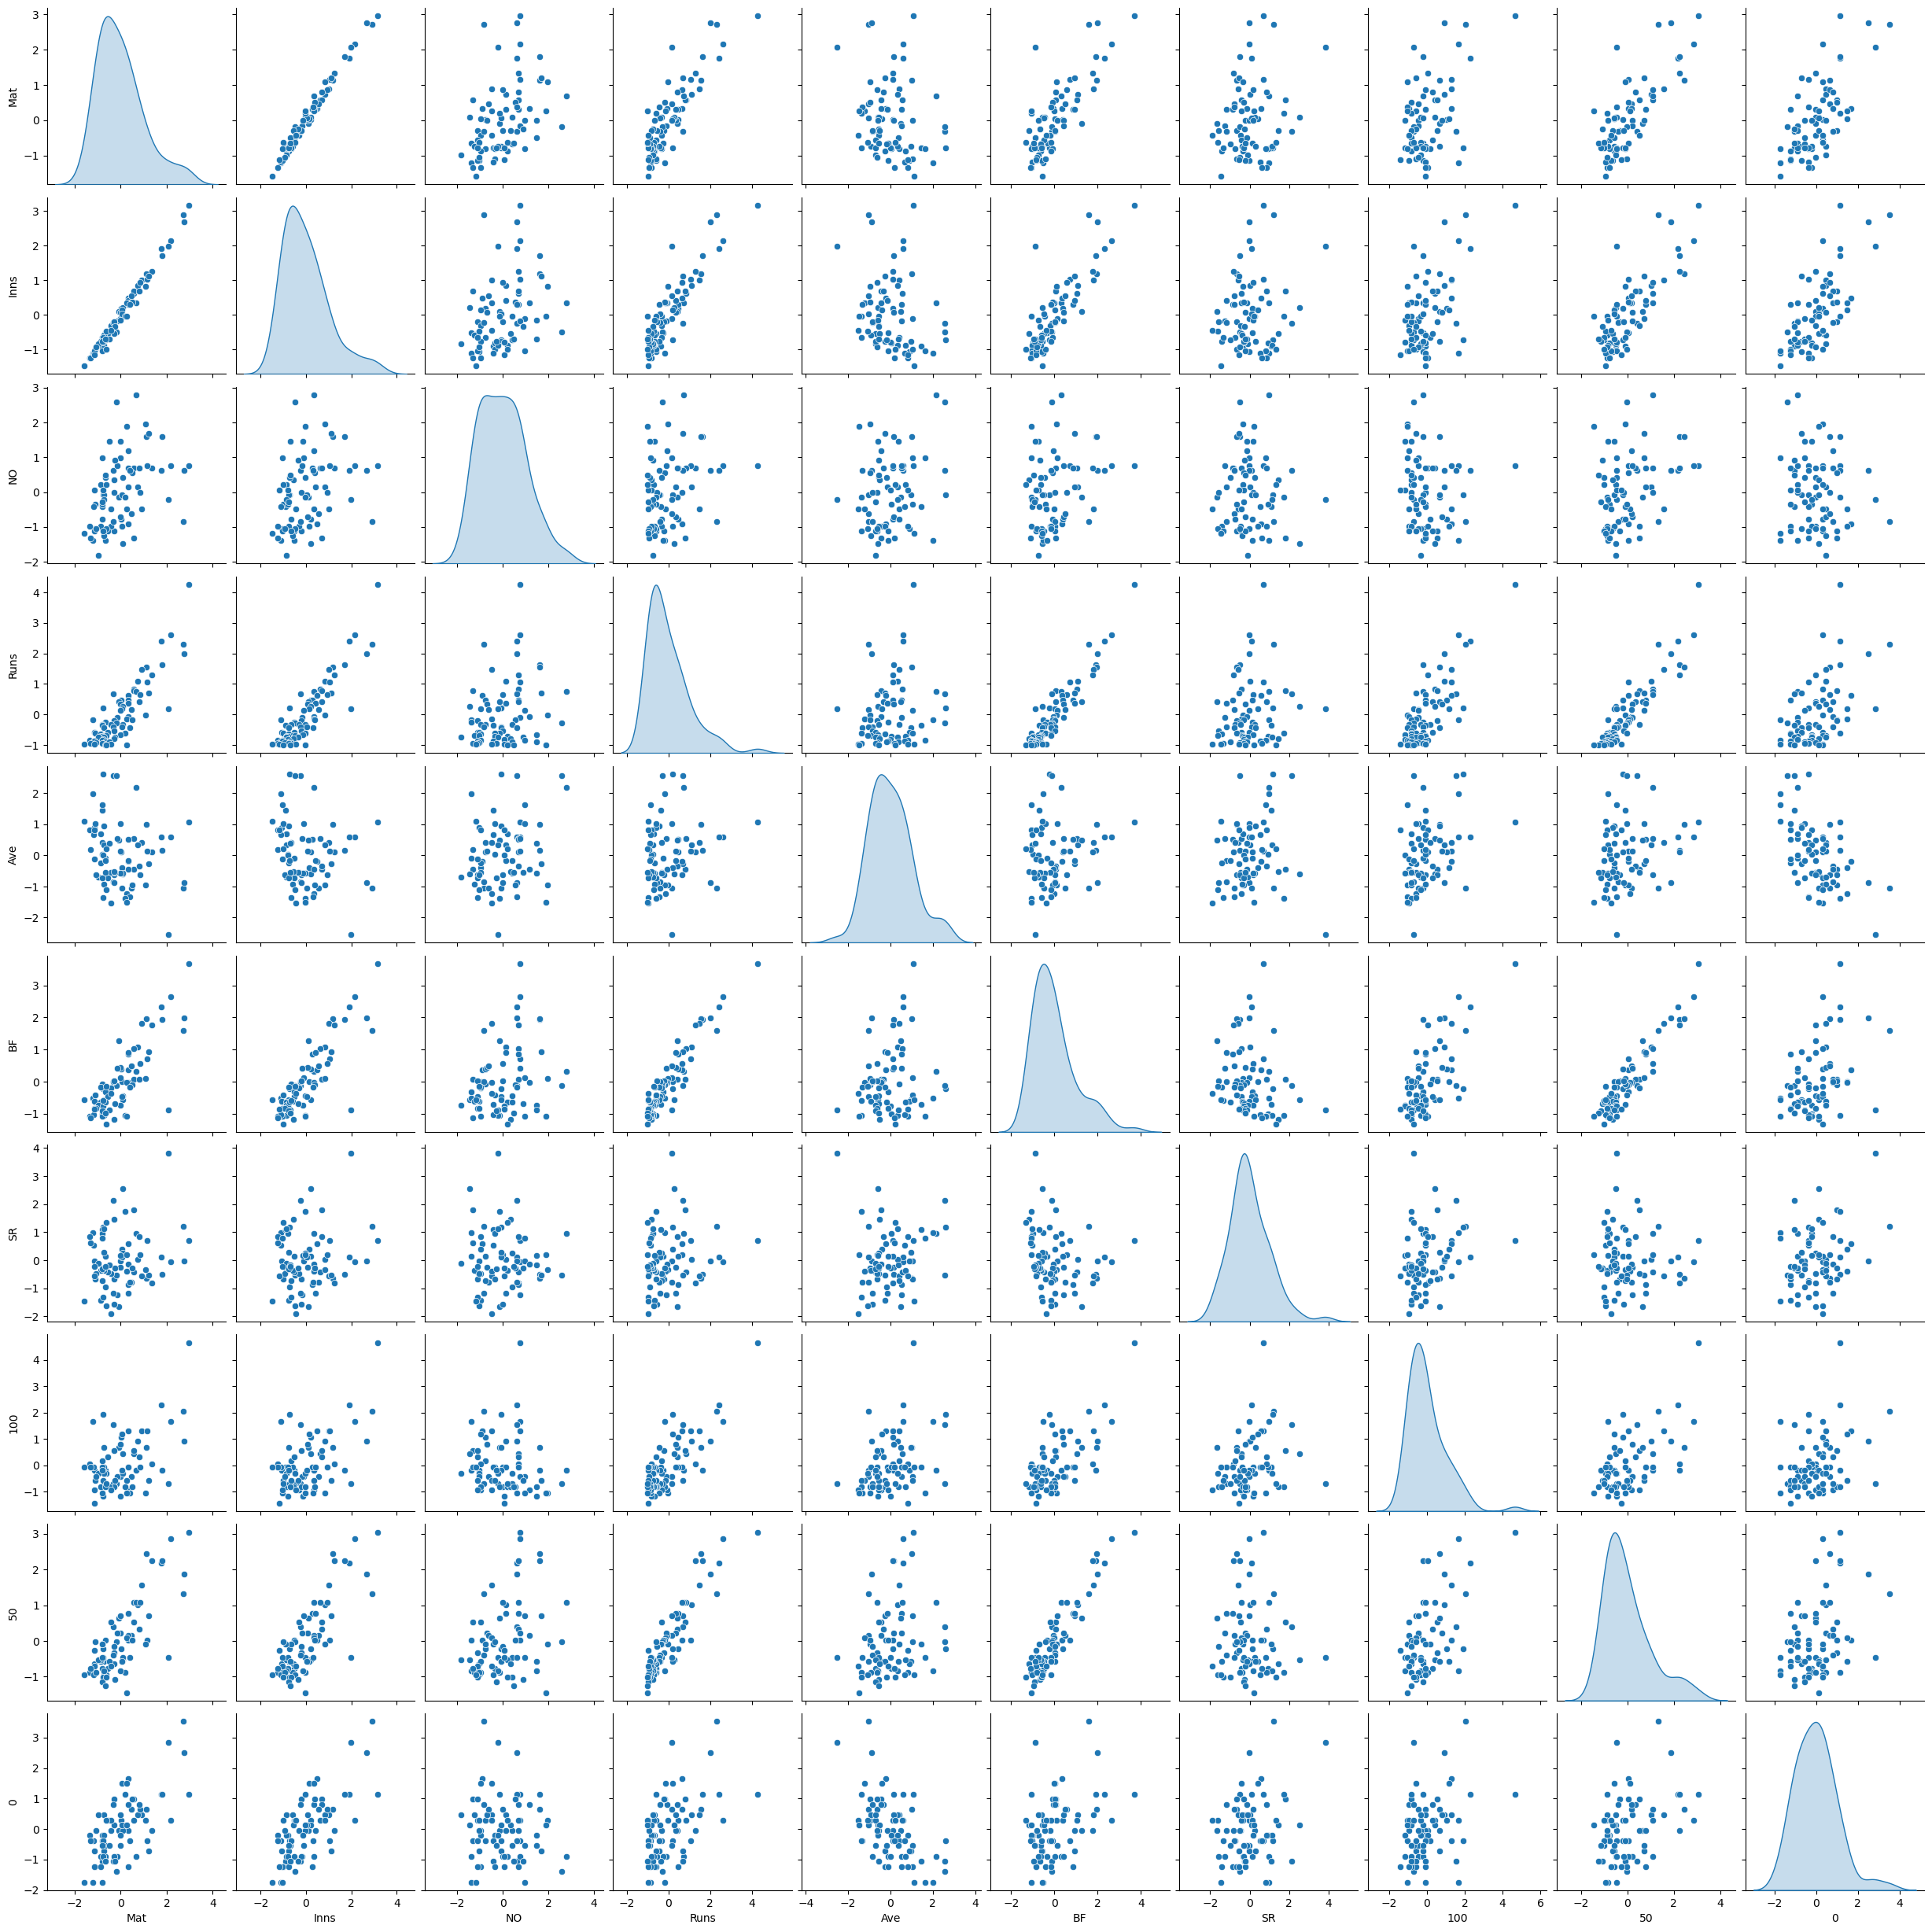

In [52]:
import seaborn as sns
sns.pairplot(cricket_df, diag_kind='kde')